### A starting notebook for homework 2

The next line activates the environment in which we are working on HW2. It is assumed that you already generated this environment, per the instructions in the document *UsingJulia.pdf*

In [1]:
using Pkg
Pkg.activate("/Users/jeff/Dropbox/MAE250H/julia/HW2")

"/Users/jeff/Dropbox/MAE250H/julia/HW2/Project.toml"

These load in some packages. The first package allows us to make immediate use of the code after we have changed it. This avoids the need to restart the Julia session every time we change code. The second line loads our HW1 module.

In [2]:
using Revise
using HW2

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.1/Revise/M1Qoh.ji for Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1184
[ Info: Generating builtins for this julia version...


### Working with our grid data types

#### Cell-centered data

Let's remind ourselves how to create cell-centered data

In [3]:
?HW2.CellData

```
CellData(data)
```

Set up a type of data that sit at cell centers. The `data` include the interior cells and the ghost cells, so the resulting grid will be smaller by 2 in each direction.

Example:

```
julia> w = ones(5,4);

julia> HW2.CellData(w)
HW2.CellData{3,2}([1.0 1.0 1.0 1.0; 1.0 1.0 1.0 1.0; … ; 1.0 1.0 1.0 1.0; 1.0 1.0 1.0 1.0])
```

---

```
CellData(nx,ny)
```

Set up cell centered data equal to zero on a grid with `(nx,ny)` interior cells. Pads with a layer of ghost cells on all sides.

---

```
CellData(p::GridData)
```

Set up cell centered data equal to zero on a grid corresponding to supplied grid data `p`. Pads with a layer of ghost cells on all sides.


Okay, let's use it in the first manner. We will set up some data (a field of 1s) and assign it to cells.

In [4]:
HW2.CellData(ones(5,4))

HW2.CellData{3,2}([1.0 1.0 1.0 1.0; 1.0 1.0 1.0 1.0; … ; 1.0 1.0 1.0 1.0; 1.0 1.0 1.0 1.0])

Let's create a set of cell data of a certain size and fill it with zeros, but set the value of a certain location to 1. Keep in mind that these data will get padded with ghost cells on all sides, so it will end up larger than the data we specify:

In [5]:
nx = 50; ny = 25
p = HW2.CellData(nx,ny)
p.data[15,5] = 1;

Here is its size, including ghost cells

In [6]:
size(p)

(52, 27)

Note that `p` is a subtype of the parent type, called `GridData`, of the same size grid.

In [7]:
typeof(p) <: HW2.GridData{50,25}

true

Let's plot it. We will use a contour plot for this.

Note that we are just plotting in index space for now, because we are not yet mapping this to physical space. We are naturally identifying the first index as the x index (representing a column of cells in the grid) and identifying the second index as the y index (a row of cells in the grid). However, an array is indexed first by its row index followed by its column index. So we need to transpose the array to plot it in index space.

In [8]:
using Plots

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


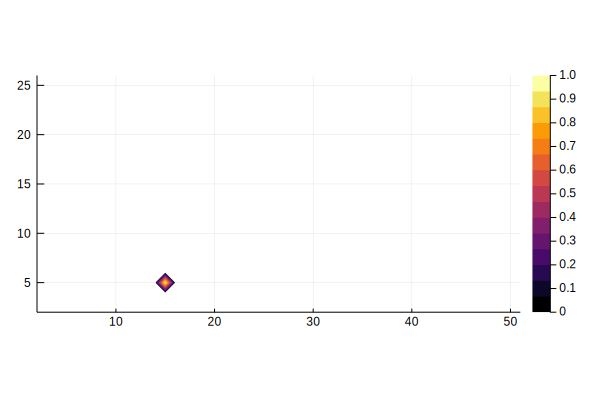

In [9]:
# Setting ratio = 1 ensures that the aspect ratio is preserved
# We set the plot limits so that only the interior cells are plotted
plot(transpose(p.data),seriestype=:contour,ratio=1,xlim=(2,nx+1),ylim=(2,ny+1))

It's not very interesting, but it verifies that we have indeed set the value to 1 at the correct position.

Let's try some other operations. We will use the LinearAlgebra package to help us with these

In [10]:
using LinearAlgebra

Here are a few other operations that come in handy. We will set up some other cell data of the same size, but with all zeros:

In [11]:
p2 = HW2.CellData(p)

HW2.CellData{50,25}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

If we take the inner product between these, we get 0, as we would expect:

In [12]:
dot(p,p2)

0.0

The norm of the original data is 1/sqrt(nx*ny), however, since one of its entries is 1:

In [14]:
norm(p)

0.0282842712474619

In [15]:
1/sqrt(nx*ny)

0.0282842712474619

Another operation we have defined on cell data is an integral:

In [16]:
?HW2.integrate

```
integrate(p::CellData) -> Real
```

Computes a numerical quadrature of the cell-centered data.

---

```
integrate(p::NodeData) -> Real
```

Computes a numerical quadrature of the node data.


In [17]:
HW2.integrate(p)

0.0008

#### Edge data

In [18]:
?HW2.EdgeData

```
EdgeData(nx,ny)
```

Set up edge data equal to zero on a grid with `(nx,ny)` interior cells. Pads with ghosts where appropriate.

---

```
EdgeData(p::GridData)
```

Set up edge data equal to zero on a grid of a size corresponding to the given grid data `p`. Pads with ghosts.

Example:

```
julia> p = HW2.CellData(5,4)
HW2.CellData{5,4}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

julia> q = HW2.EdgeData(p)
HW2.EdgeData{5,4}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])
```


So we can use existing cell-centered data to easily set up edge data with an appropriate size, if we'd like.

Let's do some basic operations on edge data on a small grid:

In [19]:
q = HW2.EdgeData(5,6)
q.qx[1,2] = 1.0
q.qx[2,2] = 1.0
nothing # used to suppress printing

To visualize this data in an array form, we transpose it, as we did for the plotting, but we also have to flip it vertically because the (1,1) entry of the array should be shown to appear in the lower left hand corner. Here, we can visualize the entries in the x component that we have set to 1:

In [20]:
reverse(transpose(q.qx),dims=1)

8×6 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

Notice that the size of the x component is 6 columns x 8 rows for a grid of size 5 x 6 interior cells. The two additional rows are the ghosts at the top and bottom; the additional column is due to the fact that the x component lives on vertical cell edges.

Meanwhile, the y component is empty. Try to make sense of its size:

In [21]:
reverse(transpose(q.qy),dims=1)

7×7 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0

This norm can be used on the edge data:

In [22]:
norm(q)

0.22360679774997896

Now let's try taking the divergence of some basic edge data:

In [23]:
nx = 50; ny = 25
q = HW2.EdgeData(nx,ny)
# choose a random x component in interior of grid and set it to 1
i, j = rand(2:nx), rand(2:ny+1)
q.qx[i,j] = 1

p = HW2.divergence(q)

HW2.CellData{50,25}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

If we plot this, we see a 1 and -1 in the resulting cell data:

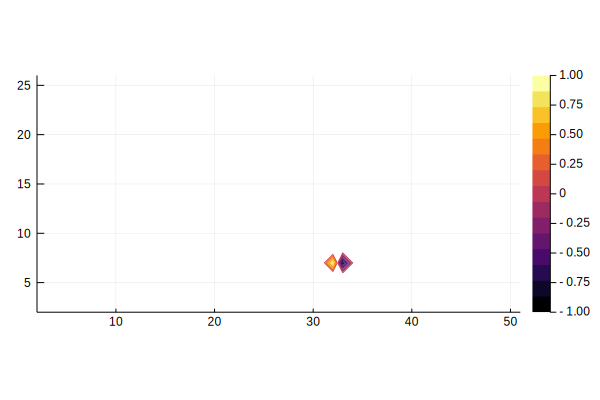

In [24]:
plot(transpose(p.data),seriestype=:contour,ratio=1,xlim=(2,nx+1),ylim=(2,ny+1))

If we integrate this cell field, we always get 0.

In [25]:
HW2.integrate(p)

0.0

#### Node data

In [28]:
?HW2.NodeData

```
NodeData(nx,ny)
```

Set up node data equal to zero on a grid with `(nx,ny)` interior cells. Note that node data has no ghosts.

---

```
NodeData(p::GridData)
```

Set up node data equal to zero on a grid of a size corresponding to the given grid data `p`.

Example:

```
julia> p = HW2.CellData(5,4)
HW2.CellData{5,4}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

julia> w = HW2.NodeData(p)
HW2.NodeData{5,4}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])
```


Here is an example of creating a blank set of node data

In [29]:
p = HW2.CellData(5,4)
w = HW2.NodeData(p)

HW2.NodeData{5,4}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

### Mapping index space to a physical space

The relationships between cell-centered $i_c$ and node $i_n$ index spaces is

$i_c = i_n + 1/2$

$j_c = j_n + 1/2$

Since the physical domain we set up will be divided into an integer number of cells, with nodes at the corners, let us establish the mapping from node index space to physical space. Then we can adjust this mapping for all other data types:

$x(i_n) = x_0 + (i_n-1)\Delta x$,

$y(j_n) = y_0 + (j_n-1)\Delta x$

This places the node at the lower left corner at $(x_0, y_0)$. Then the mapping from cell-centered variables to physical space is easily obtained by substitution:

$x(i_c) = x_0 + (i_c-3/2)\Delta x$

$y(i_c) = y_0 + (j_c-3/2)\Delta x$

An x-component of edge data is aligned with nodes in the x direction and cell centers in the y direction, so its indices relate to node indices:

$i_{e,x} = i_n$

$j_{e,x} = j_c = j_n + 1/2$.

and vice versa for y-components of edge data. The mappings to physical space follow easily.


#### Set up a domain

In [30]:
L = 1  # length of each side
x0, y0 = 0.0, 0.0  # coordinates of lower left hand corner of domain

(0.0, 0.0)

The rest of your work would follow...